In [1]:
from google.colab import files
uploaded = files.upload()  # Selecting the ZIP file from computer that was downloaded from kaggle

Saving archive (14).zip to archive (14).zip


In [2]:
import zipfile
import os

# Defining file paths
zip_path = "archive (14).zip"
extract_path = "mnist_data"

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
os.listdir(extract_path)

['t10k-images-idx3-ubyte',
 'train-images.idx3-ubyte',
 'train-images-idx3-ubyte',
 'train-labels.idx1-ubyte',
 't10k-images.idx3-ubyte',
 'train-labels-idx1-ubyte',
 't10k-labels.idx1-ubyte',
 't10k-labels-idx1-ubyte']

In [3]:
import numpy as np
import struct
import os

# Function to load MNIST images from IDX format
def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        _, num, rows, cols = struct.unpack(">IIII", f.read(16))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(num, rows, cols)

# Function to load MNIST labels from IDX format
def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        _, num = struct.unpack(">II", f.read(8))
        return np.frombuffer(f.read(), dtype=np.uint8)

# Set paths to extracted files (Update if needed)
dataset_path = "mnist_data"  # Folder where files are extracted

train_images_path = os.path.join(dataset_path, "train-images.idx3-ubyte")
train_labels_path = os.path.join(dataset_path, "train-labels.idx1-ubyte")
test_images_path = os.path.join(dataset_path, "t10k-images.idx3-ubyte")
test_labels_path = os.path.join(dataset_path, "t10k-labels.idx1-ubyte")

# Load data
train_images = load_mnist_images(train_images_path)
train_labels = load_mnist_labels(train_labels_path)
test_images = load_mnist_images(test_images_path)
test_labels = load_mnist_labels(test_labels_path)

# Display dataset shape
print(f"Train Images Shape: {train_images.shape}")  # Expected: (60000, 28, 28)
print(f"Train Labels Shape: {train_labels.shape}")  # Expected: (60000,)
print(f"Test Images Shape: {test_images.shape}")    # Expected: (10000, 28, 28)
print(f"Test Labels Shape: {test_labels.shape}")    # Expected: (10000,)")

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [4]:
# Normalize pixel values (0-255 → 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Flatten images (28x28 → 784 features)
X_train = train_images.reshape(len(train_images), -1)
X_test = test_images.reshape(len(test_images), -1)

# Labels (already in correct format)
y_train = train_labels
y_test = test_labels

# Print new shapes
print("Training Data Shape:", X_train.shape)  # Expected: (60000, 784)
print("Test Data Shape:", X_test.shape)  # Expected: (10000, 784)

Training Data Shape: (60000, 784)
Test Data Shape: (10000, 784)


In [5]:
from sklearn.model_selection import train_test_split

# Split 90% for training, 10% for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Print new dataset shapes
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)
print("Test Data Shape:", X_test.shape)

Training Data Shape: (54000, 784)
Validation Data Shape: (6000, 784)
Test Data Shape: (10000, 784)


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predict on validation data
y_val_pred = rf_model.predict(X_val)

print("Model training complete!")

Model training complete!


In [8]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate model on validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

# Display classification report
print("Classification Report on Validation Set:\n", classification_report(y_val, y_val_pred, digits=4))

Validation Accuracy: 0.972
Classification Report on Validation Set:
               precision    recall  f1-score   support

           0     0.9808    0.9840    0.9824       624
           1     0.9848    0.9924    0.9886       654
           2     0.9538    0.9755    0.9646       572
           3     0.9595    0.9660    0.9628       589
           4     0.9671    0.9638    0.9655       580
           5     0.9778    0.9601    0.9689       551
           6     0.9878    0.9810    0.9844       580
           7     0.9792    0.9668    0.9730       633
           8     0.9641    0.9641    0.9641       585
           9     0.9636    0.9636    0.9636       632

    accuracy                         0.9720      6000
   macro avg     0.9719    0.9717    0.9718      6000
weighted avg     0.9721    0.9720    0.9720      6000



In [9]:
# Predict on test data
y_test_pred = rf_model.predict(X_test)

# Evaluate model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

# Display classification report
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred, digits=4))

Test Accuracy: 0.9689
Classification Report on Test Set:
               precision    recall  f1-score   support

           0     0.9729    0.9908    0.9818       980
           1     0.9894    0.9894    0.9894      1135
           2     0.9595    0.9651    0.9623      1032
           3     0.9558    0.9644    0.9601      1010
           4     0.9676    0.9745    0.9711       982
           5     0.9761    0.9630    0.9695       892
           6     0.9740    0.9781    0.9760       958
           7     0.9715    0.9611    0.9663      1028
           8     0.9606    0.9507    0.9556       974
           9     0.9599    0.9495    0.9547      1009

    accuracy                         0.9689     10000
   macro avg     0.9688    0.9687    0.9687     10000
weighted avg     0.9689    0.9689    0.9689     10000



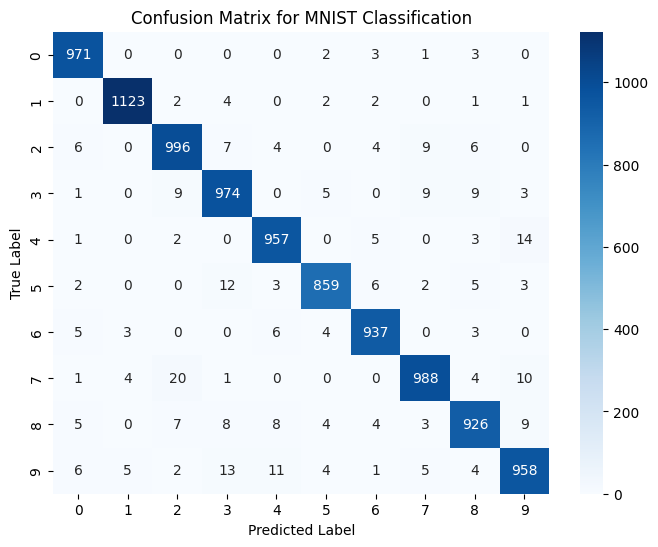

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MNIST Classification")
plt.show()

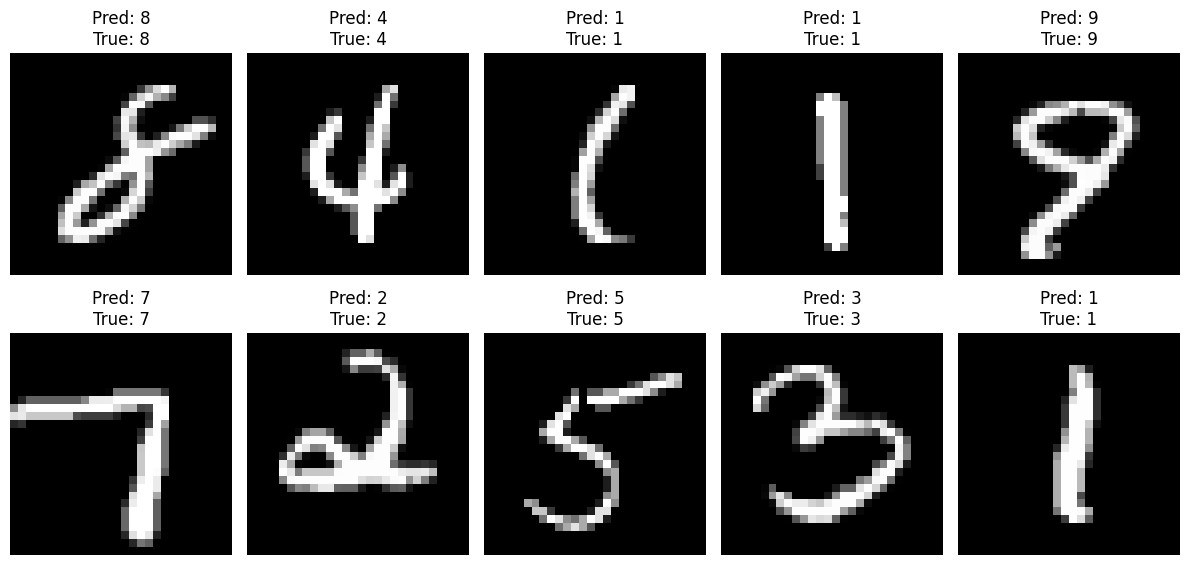

In [11]:
import matplotlib.pyplot as plt

# Select 10 random images from the test set
num_samples = 10
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
sample_images = X_test[random_indices].reshape(num_samples, 28, 28)  # Reshape back to 28x28
sample_labels = y_test[random_indices]  # True labels

# Get model predictions
predicted_labels = rf_model.predict(X_test[random_indices])

# Plot images with predicted labels
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {sample_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()